In [20]:
# Global CO2 and Temperature
# CO2 data source:          https://climate.nasa.gov/vital-signs/carbon-dioxide/
#                           https://scrippsco2.ucsd.edu/data/atmospheric_co2/icecore_merged_products.html
# Temperature data source:  https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
# Interesting article: https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide
#   - CO2 over modern vs geologic time: https://www.esrl.noaa.gov/gmd/ccgg/trends/history.html


In [1]:
import pandas
import matplotlib.pyplot as plt

# Read in CSV as a dataframe
# Reference: https://realpython.com/python-csv/#parsing-csv-files-with-the-pandas-library
CO2Df = pandas.read_csv('CO2.csv')
tempDf = pandas.read_csv('GlobalTemp.csv')
print(CO2Df)

Year  Month  Decimal Date  Monthly Average  De-seasonalized  Number days  \
NaN  1958      3     1958.2027           315.70           314.43           -1   
NaN  1958      4     1958.2877           317.45           315.16           -1   
NaN  1958      5     1958.3699           317.51           314.71           -1   
NaN  1958      6     1958.4548           317.24           315.14           -1   
NaN  1958      7     1958.5370           315.86           315.18           -1   
..    ...    ...           ...              ...              ...          ...   
NaN  2020      5     2020.3750           417.07           413.58           27   
NaN  2020      6     2020.4583           416.38           413.99           27   
NaN  2020      7     2020.5417           414.38           414.05           31   
NaN  2020      8     2020.6250           412.55           414.48           25   
NaN  2020      9     2020.7083           411.29           414.87           29   

     Std dev of days   unc. of m

<AxesSubplot:xlabel='Decimal Date'>

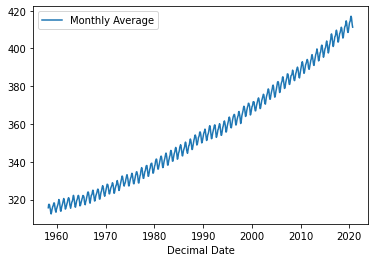

In [2]:
# Plotting CO2 by year
CO2Df.plot.line(x='Decimal Date', y='Monthly Average')

<AxesSubplot:xlabel='Year'>

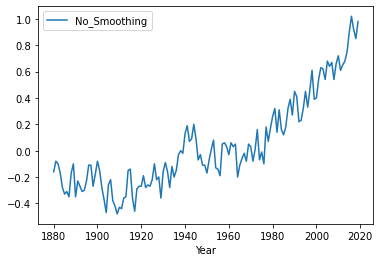

In [23]:
# Plotting Global Temp by year
tempDf.plot.line(x='Year', y='No_Smoothing')

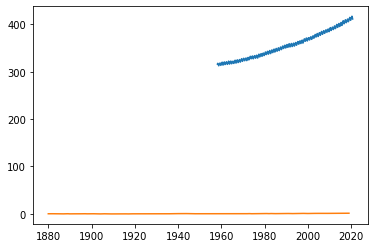

In [24]:
# Plot both together
# https://muddoo.com/tutorials/matplotlib-plot-multiple-lines-on-same-graph-using-python/
plt.plot(CO2Df['Decimal Date'], CO2Df['Monthly Average'])
plt.plot(tempDf['Year'], tempDf['No_Smoothing'])

Text(0, 0.5, 'Temp')

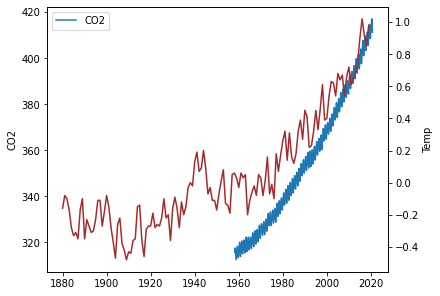

In [25]:
# Plot both together
# https://muddoo.com/tutorials/matplotlib-plot-multiple-lines-on-same-graph-using-python/

# Create figure/axes
fig, ax = plt.subplots(constrained_layout=True)

# Plot first line (CO2)
ax.plot(CO2Df['Decimal Date'], CO2Df['Monthly Average'], label='CO2')
ax.set_ylabel('CO2')
ax.legend(['CO2'])

# Create duplicate of x-axis
ax2 = ax.twinx()

# Plot Temp
ax2.plot(tempDf['Year'], tempDf['No_Smoothing'], label='Global Temp', color='brown')
ax2.set_ylabel('Temp')

In [26]:
# Perform regression
# What kind of curve looks to best fit the data?
# Reference: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
from scipy.optimize import curve_fit
import numpy as np

def exponential(x, a, b):
    return a * np.exp(b*x)

pars, cov = curve_fit(f=exponential, xdata=tempDf['Year'], ydata=tempDf['No_Smoothing'], p0=[0,0], bounds=(-np.inf, np.inf))
pars
cov

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [27]:
# Discussion
# Is this conclusive?
# What are some of the drawbacks of this analysis?
# A larger view:
#  - Define geologic time: https://en.wikipedia.org/wiki/Geologic_time_scale
#  - Video: https://www.esrl.noaa.gov/gmd/ccgg/trends/history.html
#  - Problem now isn't if we'll run out of fossil fuels (we won't for a long time). Problem is CO2 and heat.
# How can we mathematically say whether these two are related?

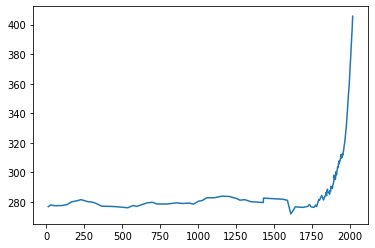

In [28]:
# Quick try with geologic time scale data
# Source: https://scrippsco2.ucsd.edu/assets/data/atmospheric/merged_ice_core_mlo_spo/merged_ice_core_yearly.csv
largeCO2Df = pandas.read_csv('merged_ice_core_yearly_CO2.csv')
plt.plot(largeCO2Df['Year CE'], largeCO2Df['CO2 (ppm)'])

In [29]:
# Join the dataframes
# What we want is a table like:
# Year      Avg CO2     Avg Temp

# But we only want the No_Smoothing column, not Lowess
# tempDf[['Year', 'No_Smoothing']]

# Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
joinedDf = largeCO2Df.set_index('Year CE').join(tempDf[['Year', 'No_Smoothing']].set_index('Year'))

# Rename No_Smoothing --> Land-Ocean Temperature Index (C)
joinedDf = joinedDf.rename(columns={'No_Smoothing': 'Land-Ocean Temperature Index (C)'})

joinedDf

CO2 (ppm)  Land-Ocean Temperature Index (C)
Year CE                                             
13.3        276.75                               NaN
29.5        277.88                               NaN
56.0        277.38                               NaN
104.5       277.51                               NaN
136.0       278.13                               NaN
...            ...                               ...
2014.0      395.87                              0.75
2015.0      397.83                              0.90
2016.0      400.78                              1.02
2017.0      403.57                              0.92
2018.0      405.66                              0.85

[171 rows x 2 columns]

<AxesSubplot:xlabel='Year CE'>

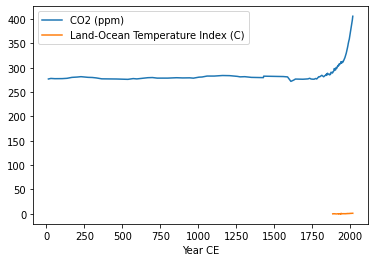

In [30]:
joinedDf.plot()

In [31]:
# Save results
joinedDf.to_csv('combined_CO2_temperature.csv')

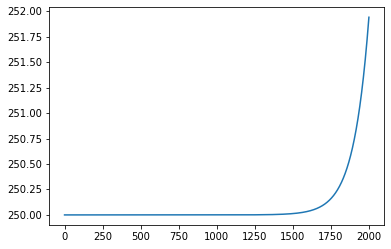

In [32]:
# First a guess at some values
x = list(np.linspace(0.0,2000.0,2000))
def exp2(x,a,b,c):
    return a * np.exp(x * b) + c
y = [exp2(xIn, 0.000000004, 0.01, 250.0) for xIn in x]
plt.plot(x,y)

In [33]:
# Perform regression
# What kind of curve looks to best fit the data?
# Reference: https://towardsdatascience.com/basic-curve-fitting-of-scientific-data-with-python-9592244a2509
from scipy.optimize import curve_fit
import numpy as np

def exp2(x,a,b,c):
    return a * np.exp(x * b) + c

# largeCO2Df['Year CE']

pars, cov = curve_fit(f=exp2, xdata=largeCO2Df['Year CE'], ydata=largeCO2Df['CO2 (ppm)'], p0=[0.000000004, 0.01, 250.0], bounds=(-np.inf, np.inf))
pars
# cov

array([9.28205618e-16, 1.95413292e-02, 2.79708729e+02])

Text(0.5, 1.0, 'Atmospheric CO2 Over Time')

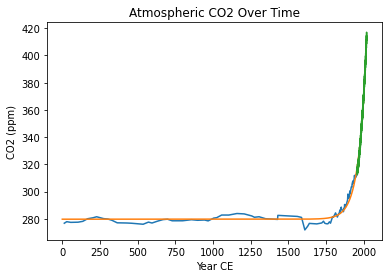

In [34]:
# Plot regression results
ax = joinedDf['CO2 (ppm)'].plot()
x = list(np.linspace(0.0,2000.0,2000))
def exp2(x,a,b,c):
    return a * np.exp(x * b) + c
y = [exp2(xIn, pars[0], pars[1], pars[2]) for xIn in x]
ax.plot(x, y)
ax.plot(CO2Df['Decimal Date'], CO2Df['Monthly Average'])
plt.ylabel('CO2 (ppm)')
plt.title('Atmospheric CO2 Over Time')

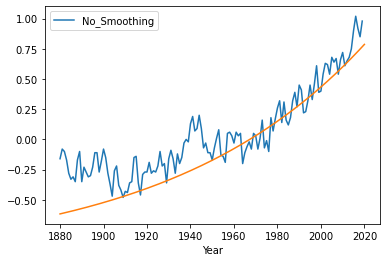

In [35]:
# Regression for temperature
# First a guess at some values
x = list(np.linspace(1880.0,2020.0,2000))
def exp2(x,a,b,c):
    return a * np.exp(x * b) + c
y = [exp2(xIn, 0.0000000004, 0.011, -1.0) for xIn in x]
ax = tempDf[['Year','No_Smoothing']].plot(x='Year', y='No_Smoothing')
plt.plot(x,y)

In [36]:
# Regression on temperature index
pars, cov = curve_fit(f=exp2, xdata=tempDf['Year'], ydata=tempDf['No_Smoothing'], p0=[0.000000003, 0.01, -1.0], bounds=(-np.inf, np.inf))
pars

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

Text(0.5, 1.0, 'Land-Ocean Temperature Index Over Time')

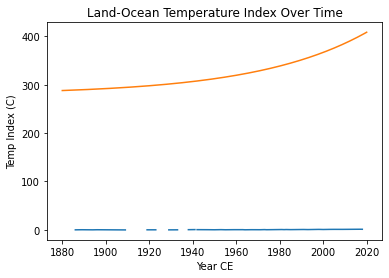

In [37]:
# Plot regression results
ax = joinedDf['Land-Ocean Temperature Index (C)'].plot()
x = list(np.linspace(1880.0,2020.0,2000))

y = [exp2(xIn, pars[0], pars[1], pars[2]) for xIn in x]
ax.plot(x, y)
plt.ylabel('Temp Index (C)')
plt.title('Land-Ocean Temperature Index Over Time')